In [60]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e9e041a8-810f-4417-ac5c-8f84a2963891',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data) - Too much data for kernel
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [61]:
type(data)

dict

In [62]:
import pandas as pd

pd.set_option("display.max_columns", None)

In [126]:
df = pd.json_normalize(data["data"])
df["timestamp"] = pd.to_datetime("now")

C:\Users\levir\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [127]:
# For calling the API to get coin market cap data.
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e9e041a8-810f-4417-ac5c-8f84a2963891',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data) - Too much data for kernel
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data["data"])
    df["timestamp"] = pd.to_datetime("now")
    df
    
    # For creating and importing called data into a csv.
    if not os.path.isfile(r"C:\Users\levir\OneDrive\Desktop\DataSets\CoinMarketCapAPI_Data\API.csv"):
        df.to_csv(r"C:\Users\levir\OneDrive\Desktop\DataSets\CoinMarketCapAPI_Data\API.csv", header = "column_names")
    else:
        df.to_csv(r"C:\Users\levir\OneDrive\Desktop\DataSets\CoinMarketCapAPI_Data\API.csv", mode = "a", header = False)
        

In [ ]:
# For Automating data pulling
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print("API Runner Completed Successfully")
    sleep(60) # Sleeps for one minute. (By Seconds)
exit()

In [96]:
# For numeric conversation from scientific notation to standard.
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [97]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9648,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19107981.00000,19107981.00000,NaN,1,NaN,NaN,NaN,2022-07-31T01:37:00.000Z,23757.88127,28199522521.95315,-20.44200,0.09065,-0.67815,5.61725,17.01926,-25.44517,-38.43516,453965143834.83972,41.28980,498915506590.23999,NaN,2022-07-31T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-31 01:37:33.177039
1,1027,Ethereum,ETH,ethereum,5869,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121765573.56150,121765573.56150,NaN,2,NaN,NaN,NaN,2022-07-31T01:36:00.000Z,1706.85842,15306926818.20836,-32.37110,0.04020,-1.07342,9.55027,56.83854,-12.35994,-39.89493,207836594424.04153,18.90350,207836594424.04001,NaN,2022-07-31T01:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-31 01:37:33.177039
2,825,Tether,USDT,tether,36787,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66197977707.85789,68158976391.28422,NaN,3,NaN,NaN,NaN,2022-07-31T01:36:00.000Z,1.00026,57050061266.96098,-19.79320,0.00255,-0.00170,0.02371,0.14072,0.09128,0.01034,66215255671.41586,6.02250,68176766184.13000,NaN,2022-07-31T01:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-31 01:37:33.177039
3,3408,USD Coin,USDC,usd-coin,4987,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,54457563253.42329,54457563253.42329,NaN,4,NaN,NaN,NaN,2022-07-31T01:36:00.000Z,0.99984,6300051571.08072,-25.82730,0.01088,0.00843,-0.00725,-0.02516,-0.01973,-0.04807,54448683902.80347,4.95250,54448683902.80000,NaN,2022-07-31T01:36:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-31 01:37:33.177039
4,1839,BNB,BNB,bnb,1041,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-07-31T01:36:00.000Z,291.53860,1561939238.69037,-40.46210,0.49632,-1.60829,12.81605,29.81350,-9.63184,-25.25109,47036038989.75551,4.27810,58307719707.13000,NaN,2022-07-31T01:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-31 01:37:33.177039
5,52,XRP,XRP,xrp,780,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,6,NaN,NaN,NaN,2022-07-31T01:37:00.000Z,0.39200,1804946922.23636,8.83960,0.01164,5.90005,8.46085,18.41665,-7.46403,-36.24209,18950312064.96481,1.72280,39199620205.87000,NaN,2022-07-31T01:37:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-31 01:37:33.177039
6,2010,Cardano,ADA,cardano,526,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33934048405.59300,34512850428.99300,NaN,7,NaN,NaN,NaN,2022-07-31T01:36:00.000Z,0.52882,1222345198.64224,-20.26120,-0.13866,1.07864,1.85437,13.59236,-14.85407,-33.21714,17945095365.24198,1.63200,23797021852.03000,NaN,2022-07-31T01:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-31 01:37:33.177039
7,4687,Binance USD,BUSD,binance-usd,4177,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17858623534.19926,17858623534.19926,NaN,8,NaN,NaN,NaN,2022-07-31T01:36:00.000Z,1.00031,6466723757.43202,-25.73230,0.21981,-0.06991,0.08266,-0.18526,0.07287,-0.07435,17864184142.54820,1.62480,17864184142.55000,NaN,2022-07-31T01:36:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-07-31 01:37:

In [98]:
# Creating a datafram that is organized by coin and it's respective value changes through time.
df_group_percent_change = df.groupby("name", sort=False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"]].mean()
df_group_percent_change

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.09065,-0.67815,5.61725,17.01926,-25.44517,-38.43516
Ethereum,0.04020,-1.07342,9.55027,56.83854,-12.35994,-39.89493
Tether,0.00255,-0.00170,0.02371,0.14072,0.09128,0.01034
USD Coin,0.01088,0.00843,-0.00725,-0.02516,-0.01973,-0.04807
BNB,0.49632,-1.60829,12.81605,29.81350,-9.63184,-25.25109
XRP,0.01164,5.90005,8.46085,18.41665,-7.46403,-36.24209
Cardano,-0.13866,1.07864,1.85437,13.59236,-14.85407,-33.21714
Binance USD,0.21981,-0.06991,0.08266,-0.18526,0.07287,-0.07435
Solana,-0.66514,3.23392,8.93213,25.76535,-4.70898,-51.55751


In [99]:
# Changing format of data
df_group_percent_change = df_group_percent_change.stack()
df_group_percent_change

name                                 
Bitcoin  quote.USD.percent_change_1h      0.09065
         quote.USD.percent_change_24h    -0.67815
         quote.USD.percent_change_7d      5.61725
         quote.USD.percent_change_30d    17.01926
         quote.USD.percent_change_60d   -25.44517
                                           ...   
Uniswap  quote.USD.percent_change_24h    -0.27598
         quote.USD.percent_change_7d     27.48726
         quote.USD.percent_change_30d    76.22903
         quote.USD.percent_change_60d    55.06665
         quote.USD.percent_change_90d    24.90907
Length: 90, dtype: float64

In [100]:
type(df_group_percent_change)

pandas.core.series.Series

In [101]:
# Converting pandas.series data back into a dataframe.
df_group_percent_change = df_group_percent_change.to_frame(name = "values")
df_group_percent_change

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.09065
        quote.USD.percent_change_24h  -0.67815
        quote.USD.percent_change_7d    5.61725
        quote.USD.percent_change_30d  17.01926
        quote.USD.percent_change_60d -25.44517
...                                        ...
Uniswap quote.USD.percent_change_24h  -0.27598
        quote.USD.percent_change_7d   27.48726
        quote.USD.percent_change_30d  76.22903
        quote.USD.percent_change_60d  55.06665
        quote.USD.percent_change_90d  24.90907

[90 rows x 1 columns]

In [102]:
type(df_group_percent_change)

pandas.core.frame.DataFrame

In [103]:
index = pd.Index(range(90))

df_group_percent_change = df_group_percent_change.reset_index()
df_group_percent_change

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.09065
1,Bitcoin,quote.USD.percent_change_24h,-0.67815
2,Bitcoin,quote.USD.percent_change_7d,5.61725
3,Bitcoin,quote.USD.percent_change_30d,17.01926
4,Bitcoin,quote.USD.percent_change_60d,-25.44517
...,...,...,...
85,Uniswap,quote.USD.percent_change_24h,-0.27598
86,Uniswap,quote.USD.percent_change_7d,27.48726
87,Uniswap,quote.USD.percent_change_30d,76.22903
88,Uniswap,quote.USD.percent_change_60d,55.06665


In [104]:
# Changing labels presentation
df_group_percent_change = df_group_percent_change.rename(columns = {"level_1": "percent_change"})
df_group_percent_change

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.09065
1,Bitcoin,quote.USD.percent_change_24h,-0.67815
2,Bitcoin,quote.USD.percent_change_7d,5.61725
3,Bitcoin,quote.USD.percent_change_30d,17.01926
4,Bitcoin,quote.USD.percent_change_60d,-25.44517
...,...,...,...
85,Uniswap,quote.USD.percent_change_24h,-0.27598
86,Uniswap,quote.USD.percent_change_7d,27.48726
87,Uniswap,quote.USD.percent_change_30d,76.22903
88,Uniswap,quote.USD.percent_change_60d,55.06665


In [105]:
# Changing labels for the y-axis
df_group_percent_change["percent_change"] = df_group_percent_change["percent_change"].replace(["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d" ], ["1h", "24h", "7d", "30d", "60d", "90d"])

In [106]:
# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

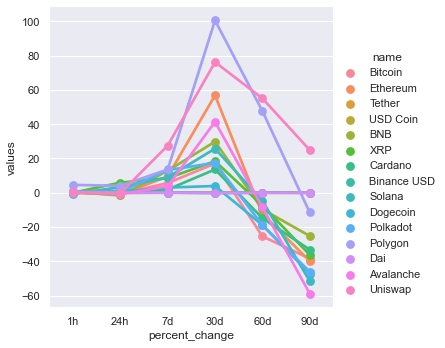

In [107]:
sns.catplot(x = "percent_change", y = "values", hue = "name", data = df_group_percent_change, kind = "point")